# Compare raw salmon NumReads values for the 5 samples that were counted in both the original compendia and in the new compendia

Because the compendia is a filtered set of RNAseq libraries, I included 5 samples that were originally processed to be a part of the compendia, but were filtered for not having enough reads.
This gives us the opportunity to assess whether the raw counts were the ~same between these libraries.

In [1]:
setwd("..")

In [2]:
# adjust plot size rendered inline
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)

In [30]:
library(readr)
library(dplyr)
library(tibble)
library(ggplot2)
library(ggcorrplot)

## PA14

In [18]:
pa14_raw_og <- read_csv("inputs/original_compendia/num_reads_pa14_cdna_k15.csv", show_col_types = F) %>%
  rename(TxName = "...1")
colnames(pa14_raw_og) <- gsub("\\.salmon", "", basename(colnames(pa14_raw_og)))
pa14_raw_new <- read_csv("outputs/combined_new_srx/num_reads_pa14.csv", show_col_types = F)

New names:
* `` -> ...1



In [19]:
table(colnames(pa14_raw_og) %in% colnames(pa14_raw_new))


FALSE  TRUE 
 2848     6 

In [22]:
pa14_raw_og_sub  <- pa14_raw_og[ , colnames(pa14_raw_og) %in% colnames(pa14_raw_new)]
pa14_raw_new_sub <- pa14_raw_new[, colnames(pa14_raw_new) %in% colnames(pa14_raw_og)]

In [31]:
pa14_sub <- left_join(pa14_raw_og_sub, pa14_raw_new_sub, by = "Name") %>%
  column_to_rownames("Name")

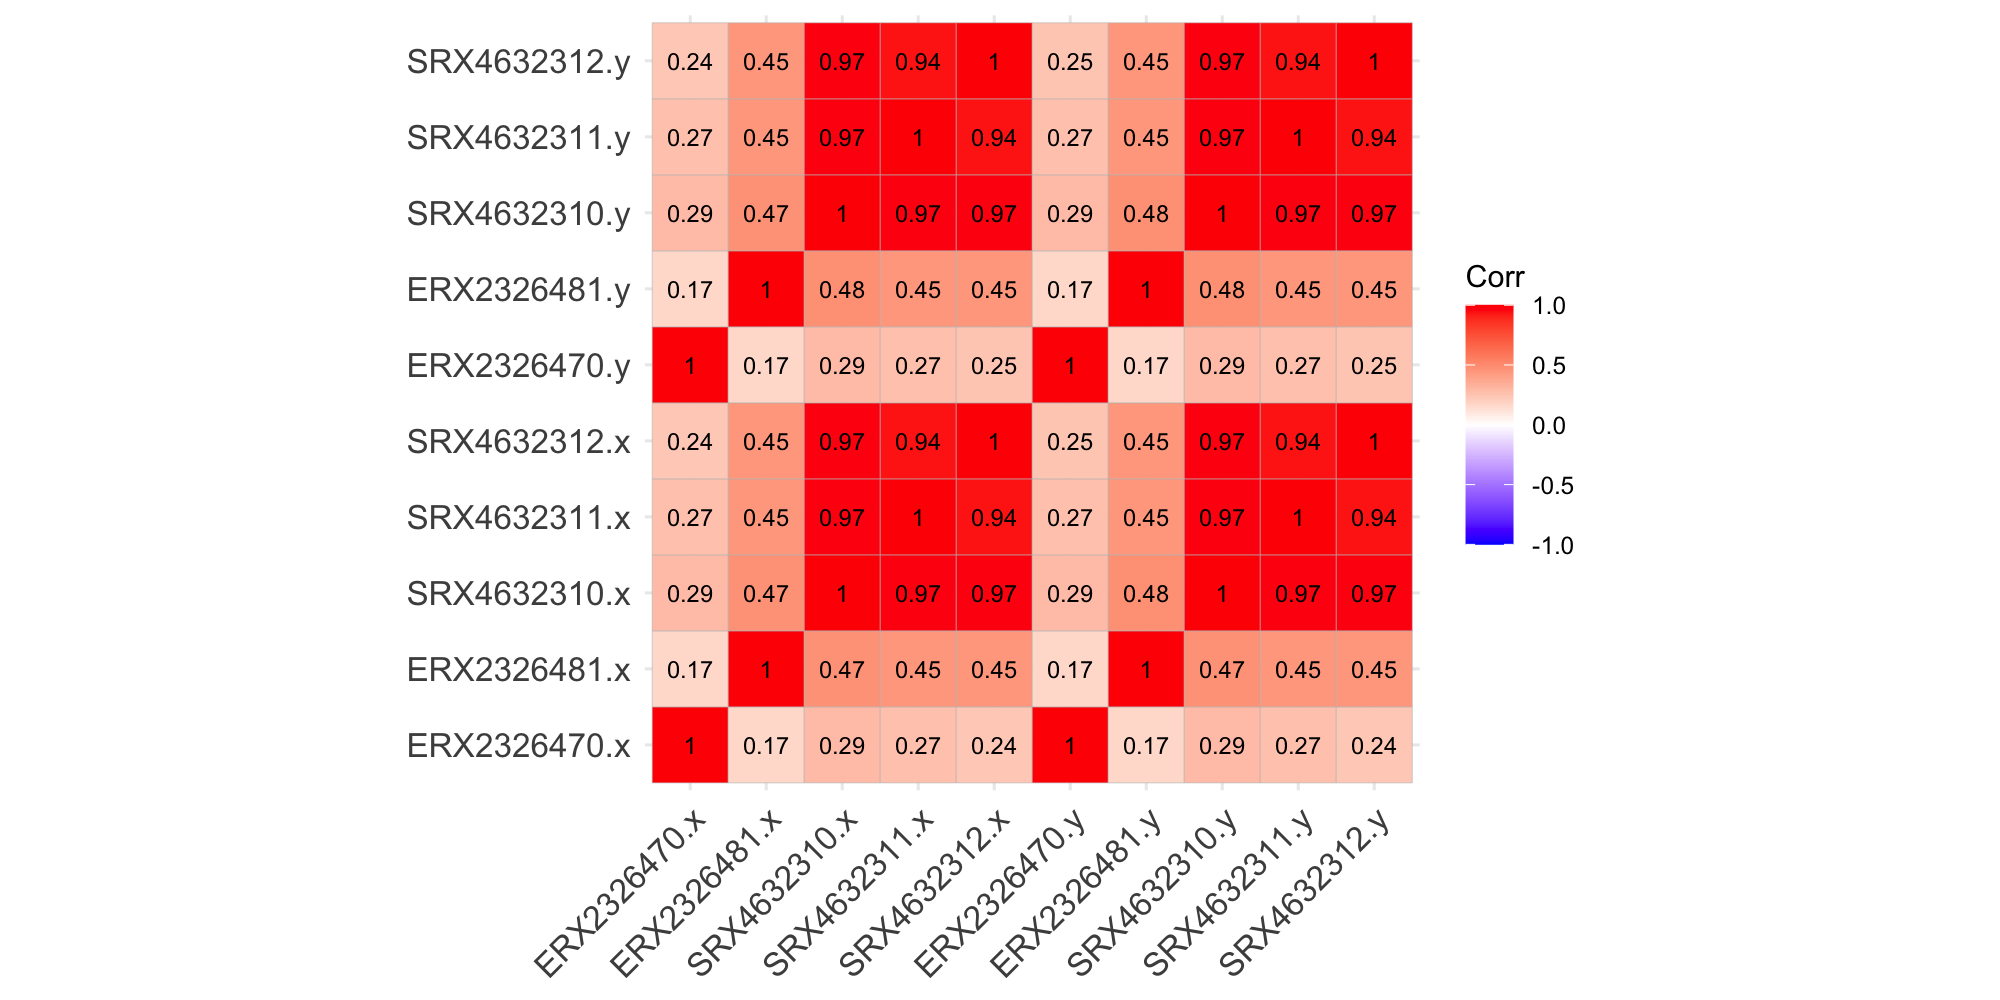

In [35]:
pa14_sub_cor <- cor(pa14_sub)
ggcorrplot(pa14_sub_cor, lab = T, digits = 2, lab_size = 3, hc.order = F)

## PAO1

In [36]:
pao1_raw_og <- read_csv("inputs/original_compendia/num_reads_pao1_cdna_k15.csv", show_col_types = F) %>%
  rename(TxName = "...1")
colnames(pao1_raw_og) <- gsub("\\.salmon", "", basename(colnames(pa14_raw_og)))
pao1_raw_new <- read_csv("outputs/combined_new_srx/num_reads_pao1.csv", show_col_types = F)

pao1_raw_og_sub  <- pa14_raw_og[ , colnames(pao1_raw_og) %in% colnames(pao1_raw_new)]
pao1_raw_new_sub <- pa14_raw_new[, colnames(pao1_raw_new) %in% colnames(pao1_raw_og)]

pao1_sub <- left_join(pao1_raw_og_sub, pao1_raw_new_sub, by = "Name") %>%
  column_to_rownames("Name")

New names:
* `` -> ...1



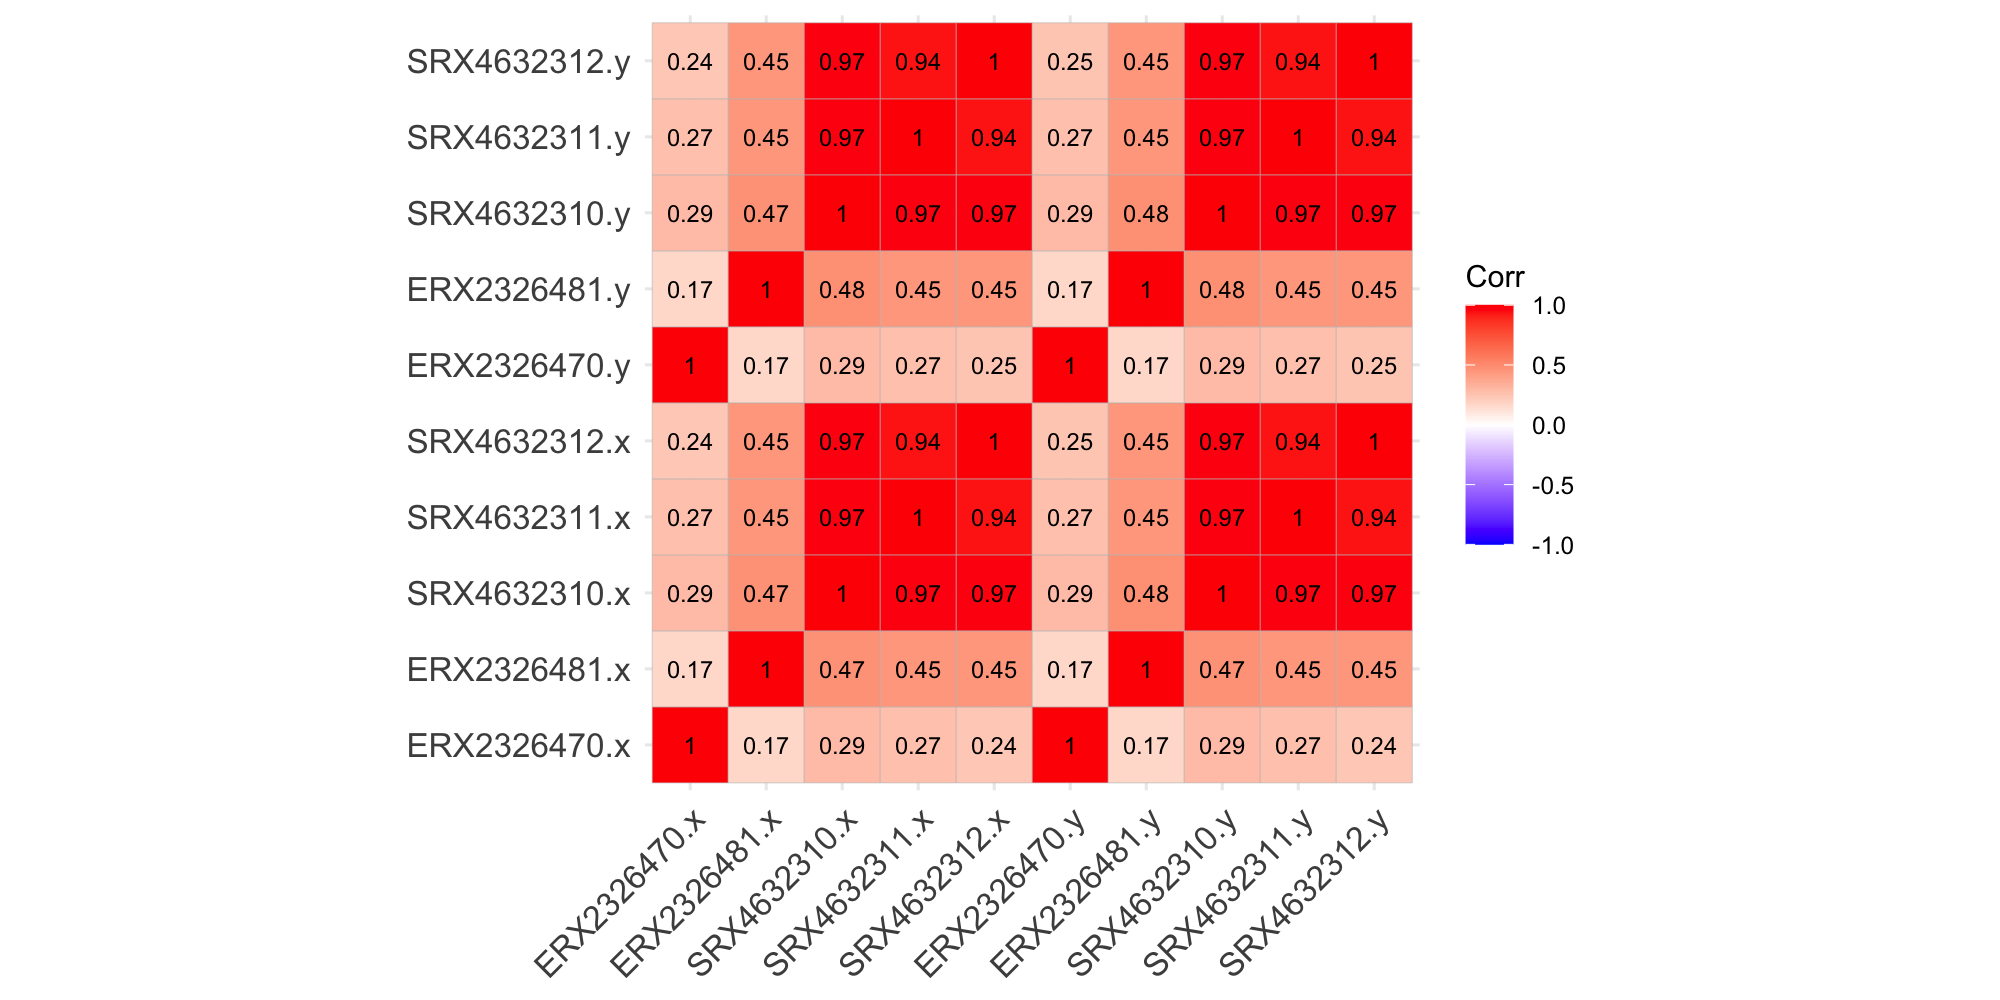

In [37]:
pao1_sub_cor <- cor(pao1_sub)
ggcorrplot(pao1_sub_cor, lab = T, digits = 2, lab_size = 3, hc.order = F)

In [39]:
all.equal(pao1_sub$ERX2326470.x, pao1_sub$ERX2326470.y)

[1] "Mean relative difference: 0.2214215"